# INITIALIZATION

In [0]:

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Setting up gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd

In [1]:

!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/COLAB/MicroCalc")
!ls --full-time

!pip install -q scikit-plot
# !pip install -q tflearn

total 220500
-rw-r--r-- 1 root root  56322144 2018-06-12 06:54:44.000000000 +0000 300kNegative_test.h5
-rw-r--r-- 1 root root 155765344 2018-06-12 06:54:20.000000000 +0000 300kNegative_train.h5
-rw-r--r-- 1 root root      5455 2018-06-18 16:41:36.000000000 +0000 CLR.py
drwxr-xr-x 2 root root      4096 2018-06-17 12:37:46.000000000 +0000 drive
-rw-r--r-- 1 root root      6500 2018-06-13 10:06:55.000000000 +0000 KerasCNN.py
-rw-r--r-- 1 root root      4639 2018-06-19 05:24:28.000000000 +0000 kerasModel_exp1.json
-rw-r--r-- 1 root root      4638 2018-06-19 05:03:31.000000000 +0000 kerasModel_exp2.json
-rw-r--r-- 1 root root      4638 2018-06-19 05:57:22.000000000 +0000 kerasModel_exp3.json
-rw-r--r-- 1 root root      4638 2018-06-19 06:54:12.000000000 +0000 kerasModel_exp_sk36_1.json
-rw-r--r-- 1 root root      4640 2018-06-19 07:02:34.000000000 +0000 kerasModel_exp_sk36_2.json
-rw-r--r-- 1 root root      4640 2018-06-19 07:29:05.000000000 +0000 kerasModel_exp_sk36_3.json
-rw-r--r-- 1 roo

# Train

In [8]:
import datetime

train_size  = 128000
actual_num_pos_train = 3459
actual_num_neg_train = train_size - actual_num_pos_train


#initially, the rising edge covers the complete experiment
fixed_lr = 0.2
base_lr = 0.002    #1e-3
max_lr = 0.03      #4e-1
epochs = 12
epochs_per_step = 2
batch_size = 32
step_size = (int)(((train_size/batch_size))*epochs_per_step) 
print('confirmed at {}'.format(datetime.datetime.now().time()))

model_name = "kerasModel_fixed.json"
weights_name = "modelWeights_fixed.h5"
normalizer_name = "normalizer_fixed.pkl"
policy = 'exp_range'

# to save models, weights, and normalizers
save = False; 

confirmed at 20:12:51.208242


In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from CLR import CyclicLR
### keras tools
from keras.models import model_from_json
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


## sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt

import h5py
#################################################################################################################

# POSITIVE - TRAIN
print("version 7")


print("step_size = {}".format(step_size))
print('epochs {}, base_lr {}, max_lr {}, batch_size {}, epochs_per_step {}'.format(epochs, base_lr, max_lr, batch_size, epochs_per_step))
fpos = h5py.File('Positive_train.h5', 'r')
first_key=list(fpos.keys())[0]
dpos=fpos[first_key]
size_image=dpos.shape[1]
num_pos_train = dpos.shape[0]
dposar = np.zeros(dpos.shape)
dpos.read_direct(dposar)
train_pos=dposar.reshape([-1,size_image,size_image,1])

print("Total positive patches for training are: ", num_pos_train)

# NEGATIVE - TRAIN
fneg = h5py.File('300kNegative_train.h5', 'r')
first_key=list(fneg.keys())[0]
dneg=fneg[first_key]
size_image=dneg.shape[1]
num_neg_train = dneg.shape[0]
dnegar = np.zeros(dneg.shape)
dneg.read_direct(dnegar)
train_neg=dnegar.reshape([-1,size_image,size_image,1])

print("Total negative patches for training are: ", num_neg_train)
print('-----------------------------------------------------------')

print("Positive patches for training are: ", actual_num_pos_train)
print("Negative patches for training are: ", actual_num_neg_train)



# Create the target vectors
train_pos_lab = np.ones((actual_num_pos_train,1))
train_neg_lab = np.zeros((actual_num_neg_train,1))

#### Build the training set  (images and targets)
tpos = np.copy(train_pos[0:actual_num_pos_train,:,:,:])
tneg = np.copy(train_neg[0:actual_num_neg_train,:,:,:])

# Stack the subsets
X_Train = np.vstack((tpos,tneg))
Y_Train = np.vstack((train_pos_lab,train_neg_lab))

# Shuffle the two arrays in unison
X_Train, Y_Train = shuffle(X_Train,Y_Train)

######################################################## augmentation + 
#######################         Normalization

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=0,
    vertical_flip=False)
datagen.fit(X_Train)

################################# Network architecture
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',padding='same', name='block1_conv1', input_shape = X_Train.shape[1:]))
model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block2_conv1'))
model.add(Conv2D(filters =32, kernel_size=(3, 3), activation='relu',padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

model.add(Flatten())

model.add(Dense(units = 256, activation='relu', name='fc1'))
model.add(Dropout(rate=0.5))

model.add(Dense(units = 256, activation='relu', name='fc2'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=2, activation='softmax', name='predictions'))


Y_one_hot = to_categorical(np.ravel(Y_Train),2)

#### fixed lr part

# gradientDescent = SGD(lr= 0.1, decay=0.96)
# model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])

# model.fit_generator(datagen.flow(x= X_Train, y =Y_one_hot,batch_size = batch_size),
#                      verbose = 2,epochs=epochs,  use_multiprocessing=True) #steps_per_epoch=len(X_Train) /batch_size,


##clr

clr_triangular = CyclicLR(mode = policy, base_lr = base_lr, max_lr = max_lr, step_size = step_size, gamma=0.99994)

gradientDescent=SGD()
model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])

#### model.summary()
model.fit_generator(datagen.flow(x= X_Train, y =Y_one_hot,batch_size = batch_size),steps_per_epoch=len(X_Train) / batch_size,
                    callbacks=[clr_triangular], verbose=2, 
                    epochs=epochs, use_multiprocessing=True)

plt.figure(1)
plt.ylabel('Training accuracy')
plt.xlabel('Learning Rate')
plt.title("CLR - '{}' Policy".format(policy))
plt.plot(clr_triangular.history['lr'],clr_triangular.history['acc'] )

plt.figure(2)

plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title("CLR - '{}' Policy".format(policy))
plt.plot(clr_triangular.history['iterations'],clr_triangular.history['lr'] )

plt.figure(3)

plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title("CLR - '{}' Policy".format(policy))
plt.plot(clr_triangular.history['iterations'],clr_triangular.history['acc'] )

#####################################################
#NORMALIATION    #######################################

normalized_Xtrain = datagen.standardize(X_Train)

####################################################
####################################################
y_pred_keras = model.predict_proba(normalized_Xtrain, verbose=2, batch_size=batch_size)
fpr_keras, tpr_keras, _ = roc_curve(Y_Train, y_pred_keras[:,1])
train_auc = roc_auc_score(Y_Train, y_pred_keras[:,1])

train_precision, train_recall, train_f1score,_ = precision_recall_fscore_support(Y_Train, np.argmax(y_pred_keras, axis=1),average = 'binary')
print("AUC: %.4f PRECISION:  %.4f RECALL: %.4f F1SCORE: %.4f " %(train_auc,train_precision, train_recall, train_f1score))


skplt.metrics.plot_roc(Y_Train, y_pred_keras, plot_micro=False, plot_macro=False, classes_to_plot=1)
############################### #serialize model to JSON and weights to HDF5
if save == True:
    model_json = model.to_json()
    with open(model_name, 'w') as json_file:
        json_file.write(model_json)

    model.save_weights(weights_name)
    joblib.dump(datagen,normalizer_name)

    print("model {}, normalizer, and weights have been saved".format(model_name))

###############################



version 7
step_size = 2000
epochs 20, base_lr 0.002, max_lr 0.03, batch_size 128, epochs_per_step 2
Total positive patches for training are:  3459
Total negative patches for training are:  304225
-----------------------------------------------------------
Positive patches for training are:  3459
Negative patches for training are:  124541
Epoch 1/20
 - 14s - loss: 0.2251 - acc: 0.9722
Epoch 2/20
 - 14s - loss: 0.1812 - acc: 0.9730
Epoch 3/20
 - 14s - loss: 0.1756 - acc: 0.9730
Epoch 4/20
 - 14s - loss: 0.1726 - acc: 0.9730
Epoch 5/20


# **TEST**

Total positive patches for testing are:  1164
Total negative patches for testing are:  110000
model kerasModel_exp_sk36_3.json loaded
111164/111164 [==============================] - 13s 116us/step
The Scored loss is 0.0063, accuracy 0.9980
AUC: 0.9970 PRECISION:  0.8659 RECALL: 0.9596 F1SCORE: 0.9104 


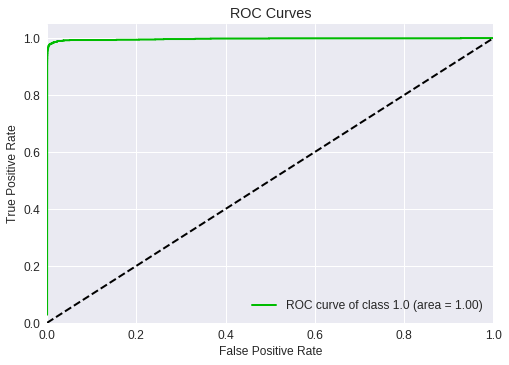

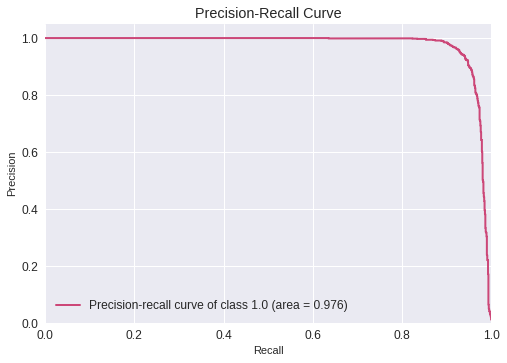

In [49]:
from __future__ import print_function

import numpy as np

from keras.models import model_from_json
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.externals import joblib
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import scikitplot as skplt
import h5py


#################################################################################################################
# POSITIVE - Test
fpos = h5py.File('Positive_test.h5', 'r')
first_key = list(fpos.keys())[0]
dpos=fpos[first_key]
size_image=dpos.shape[1]
num_pos_test = dpos.shape[0]
dposar = np.zeros(dpos.shape)
dpos.read_direct(dposar)
test_pos=dposar.reshape([-1,size_image,size_image,1])

print("Total positive patches for testing are: ", num_pos_test)

# NEGATIVE - Test
fneg = h5py.File('300kNegative_test.h5', 'r')
first_key=list(fneg.keys())[0]
dneg=fneg[first_key]
size_image=dneg.shape[1]
num_neg_test = dneg.shape[0]
dnegar = np.zeros(dneg.shape)
dneg.read_direct(dnegar)
test_neg=dnegar.reshape([-1,size_image,size_image,1])

print("Total negative patches for testing are: ", num_neg_test)

# the sum of positive and negative test set ~= 20% od training set size
actual_num_pos_test = 1164
actual_num_neg_test = 110000

# Create the target vectors
test_pos_lab = np.ones((actual_num_pos_test,1))
test_neg_lab = np.zeros((actual_num_neg_test,1))

#### Build the training set  (images and targets)
tpos = np.copy(test_pos[0:actual_num_pos_test,:,:,:])
tneg = np.copy(test_neg[0:actual_num_neg_test,:,:,:])

# Stack the subsets
X_Test = np.vstack((tpos,tneg))
Y_Test = np.vstack((test_pos_lab,test_neg_lab))

json_file = open(model_name, 'r')
loaded_json_model = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_json_model)
loaded_model.load_weights(weights_name)

print("model {} loaded".format(model_name))
gradientDescent = SGD(lr= 0.1, decay=0.96)
loaded_model.compile(gradientDescent, loss= 'categorical_crossentropy', metrics = ['accuracy'])

####### Loading NORMALIZER #######
########                 ################################
normalizer  = joblib.load(normalizer_name)
normalized_Xtest = normalizer.standardize(X_Test)

predictions = loaded_model.predict_proba(normalized_Xtest)
Y_one_hot = to_categorical(np.ravel(Y_Test),2)
score = loaded_model.evaluate(x=X_Test,y= Y_one_hot)
print("The Scored loss is %.4f, accuracy %.4f"%(score[0], score[1]))

# print('accuracy ={}'.format(np.mean(np.argmax(predictions,1)==Y_Test)))
# print('accuracy ={}'.format(accuracy_score(Y_Test, np.argmax(predictions,1))))

fpr_keras, tpr_keras, _ = roc_curve(Y_Test, predictions[:,1])

test_auc = roc_auc_score(Y_Test, predictions[:,1])

test_precision, test_recall, test_f1score, _ = precision_recall_fscore_support(Y_Test, np.argmax(predictions, axis=1),average = 'binary')

print("AUC: %.4f PRECISION:  %.4f RECALL: %.4f F1SCORE: %.4f " %(test_auc,test_precision, test_recall, test_f1score))

skplt.metrics.plot_roc(Y_Test, predictions ,plot_micro=False, plot_macro=False, classes_to_plot=1)
skplt.metrics.plot_precision_recall(Y_Test, predictions ,plot_micro=False, classes_to_plot=1, cmap='plasma')
